<a href="https://colab.research.google.com/github/RanxduG/Stock-Trend-Prediction-System/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as wb
import datetime

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [54]:
!python --version

Python 3.10.12


In [2]:
df = wb.DataReader('AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378827,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.082329,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.147987,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519936,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.493141,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.911537,144114400


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378827,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


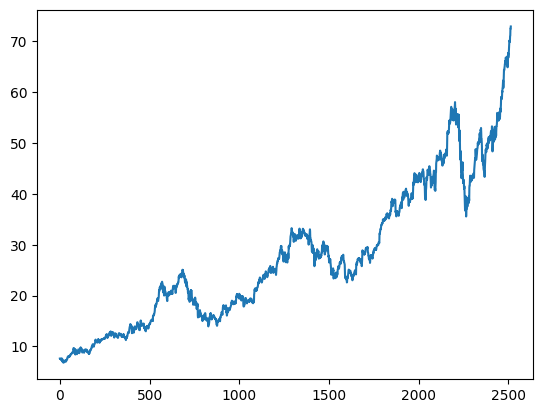

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

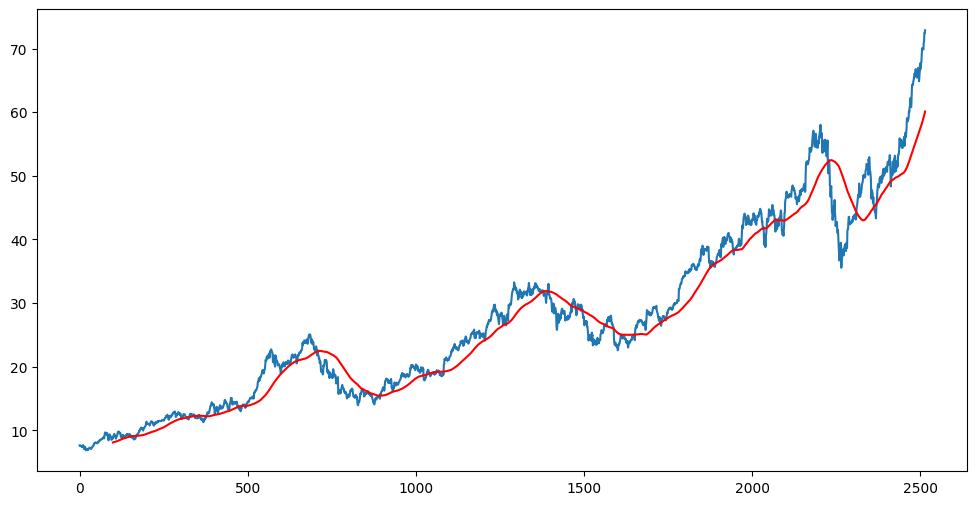

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

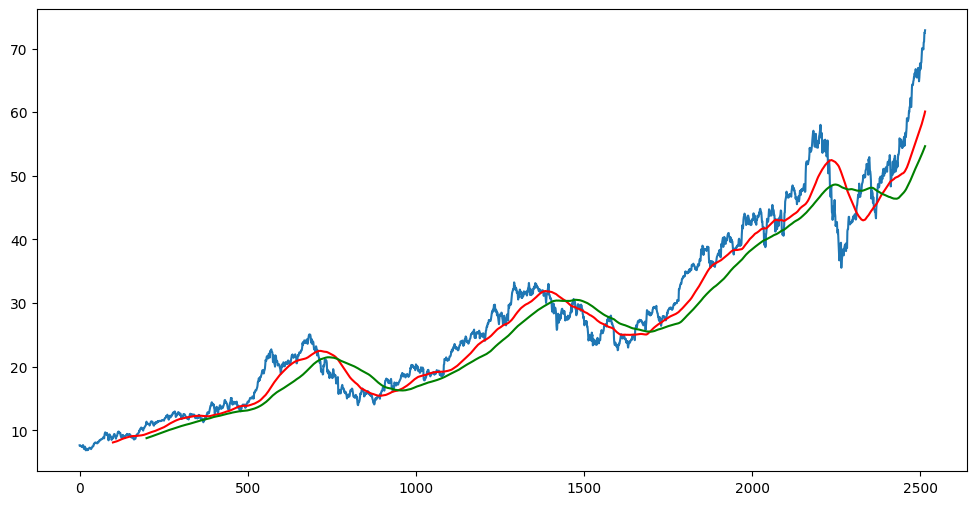

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2515, 5)

##Train Test Split

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [26]:
# Assuming data_training is your DataFrame
nan_count = data_training.isna().sum()
print("Number of NaN values in data_training:")
print(nan_count)

Number of NaN values in data_training:
Close    0
dtype: int64


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training.shape

(1760, 1)

In [18]:
import numpy as np

data_training_array = scaler.fit_transform(data_training)


In [19]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
x_train.shape

(1660, 100, 1)

In [32]:
x_train

array([[[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       [[0.02560389],
        [0.02507608],
        [0.02697067],
        ...,
        [0.07045129],
        [0.08295551],
        [0.08773258]],

       ...,

       [[0.74224237],
        [0.74300022],
        [0.7582516 ],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

##Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [52]:
import keras
print(keras.__version__)


2.15.0


In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1) ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
y_train

array([0.08295551, 0.08773258, 0.093078  , ..., 0.84388656, 0.85089656,
       0.84616011])

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 20s 284ms/step - loss: 0.0541
Epoch 2/50
52/52 [==============================] - 14s 275ms/step - loss: 0.0130
Epoch 3/50
52/52 [==============================] - 14s 275ms/step - loss: 0.0122
Epoch 4/50
52/52 [==============================] - 14s 278ms/step - loss: 0.0094
Epoch 5/50
52/52 [==============================] - 14s 274ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 15s 288ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 15s 287ms/step - loss: 0.0080
Epoch 8/50
52/52 [==============================] - 15s 280ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 14s 274ms/step - loss: 0.0073
Epoch 10/50
52/52 [==============================] - 14s 274ms/step - loss: 0.0079
Epoch 11/50
52/52 [==============================] - 14s 275ms/step - loss: 0.0072
Epoch 12/50
52/52 [==============================] - 14s 273ms/step - loss: 0.0057
Epoch 13/50
5

In [51]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [36]:
past_100_days = data_training.tail(100)

In [37]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-37-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [38]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [39]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [40]:
input_data.shape

(855, 1)

In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])



In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [43]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


##Making Predictions

In [44]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 78ms/step


In [45]:
y_predicted.shape

(755, 1)

In [46]:
y_predicted

array([[0.11704069],
       [0.11764146],
       [0.11823358],
       [0.11879998],
       [0.11933413],
       [0.119829  ],
       [0.12028031],
       [0.12068835],
       [0.12105671],
       [0.12139076],
       [0.12169702],
       [0.12198085],
       [0.12224708],
       [0.12250161],
       [0.12274899],
       [0.12299253],
       [0.12323479],
       [0.12347725],
       [0.12372178],
       [0.12397264],
       [0.12423351],
       [0.1245067 ],
       [0.12479216],
       [0.12510632],
       [0.12549397],
       [0.12600118],
       [0.12667546],
       [0.12756477],
       [0.1287134 ],
       [0.13015635],
       [0.13191342],
       [0.1339907 ],
       [0.13639073],
       [0.13911149],
       [0.14214031],
       [0.14544906],
       [0.14899501],
       [0.15272456],
       [0.1565746 ],
       [0.16047657],
       [0.16436338],
       [0.16817248],
       [0.17186138],
       [0.17539538],
       [0.17874973],
       [0.181905  ],
       [0.18484789],
       [0.187

In [47]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [48]:
scaler.scale_

array([0.02123255])

In [49]:
y_predicted = y_predicted/0.02123255
y_test = y_test/0.02123255

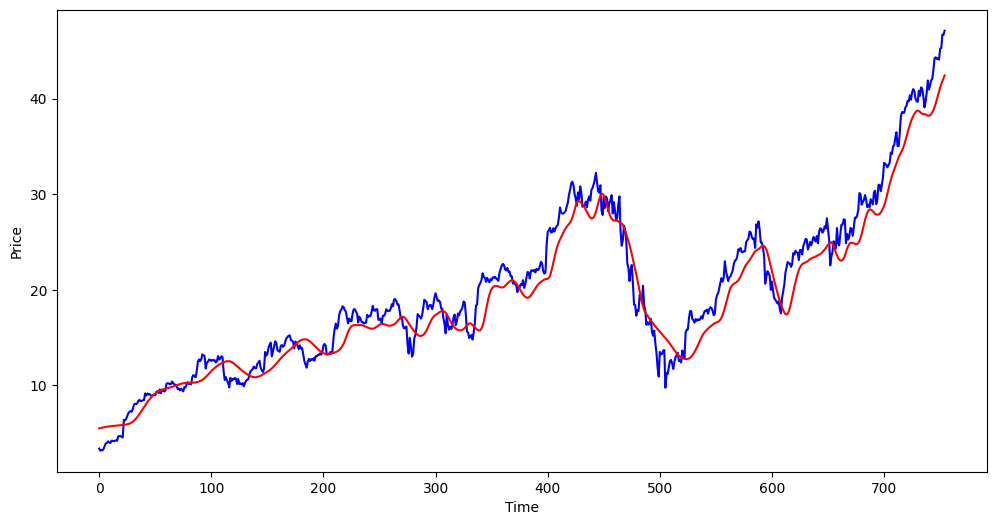

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()